In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import ast

In [9]:

df = pd.read_csv("/home/ubuntu/multimodal/Predictions_and_attempts/results_medical_bge/1_1.csv")
df_nlinear = pd.read_csv("/home/ubuntu/multimodal/Predictions_and_attempts/medical/1_day/mixed/nlinear_output_test.csv")
df_nlinear_text = pd.read_csv("/home/ubuntu/multimodal/Predictions_and_attempts/medical/1_day/mixed/nlinear_text_output_test.csv")
df_nlinear['nlinear_times'] = df_nlinear['pred_num'].apply(ast.literal_eval)
df_nlinear_text['nlinear_text_times'] = df_nlinear_text['pred_num'].apply(ast.literal_eval)


df['input_times'] = df['input_times'].apply(
    lambda x: np.fromstring(x.strip('[]'), sep=' ').tolist())
df['output_times'] = df['output_times'].apply(
    lambda x: np.fromstring(x.strip('[]'), sep=' ').tolist())
df['pred_times'] = df['pred_times'].apply(
    lambda x: np.fromstring(x.strip('[]'), sep=' ').tolist())



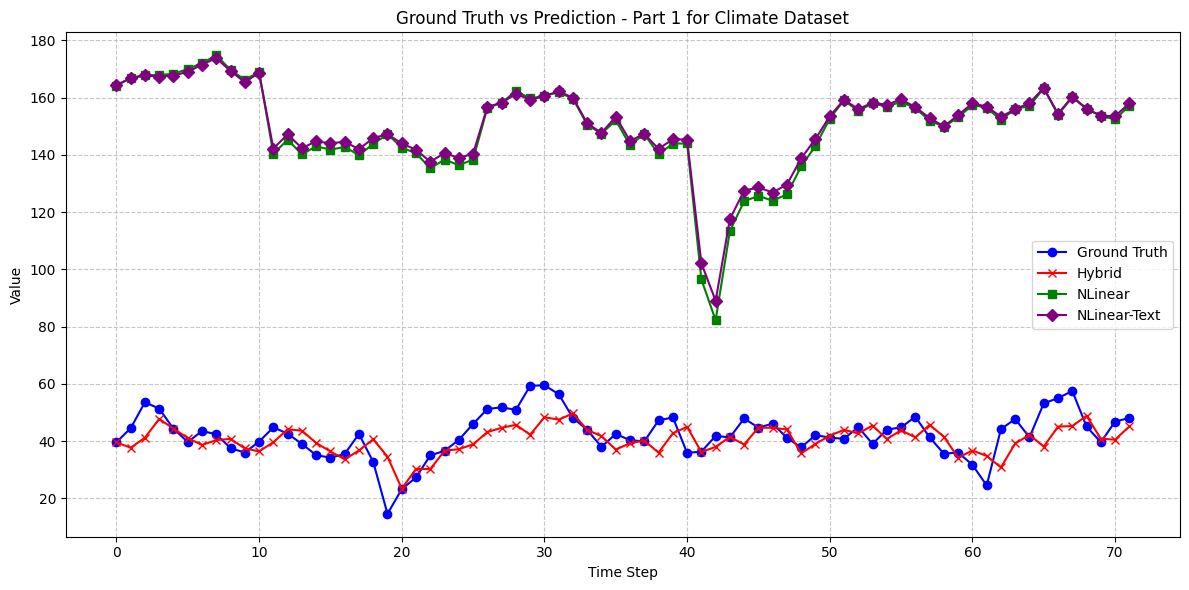

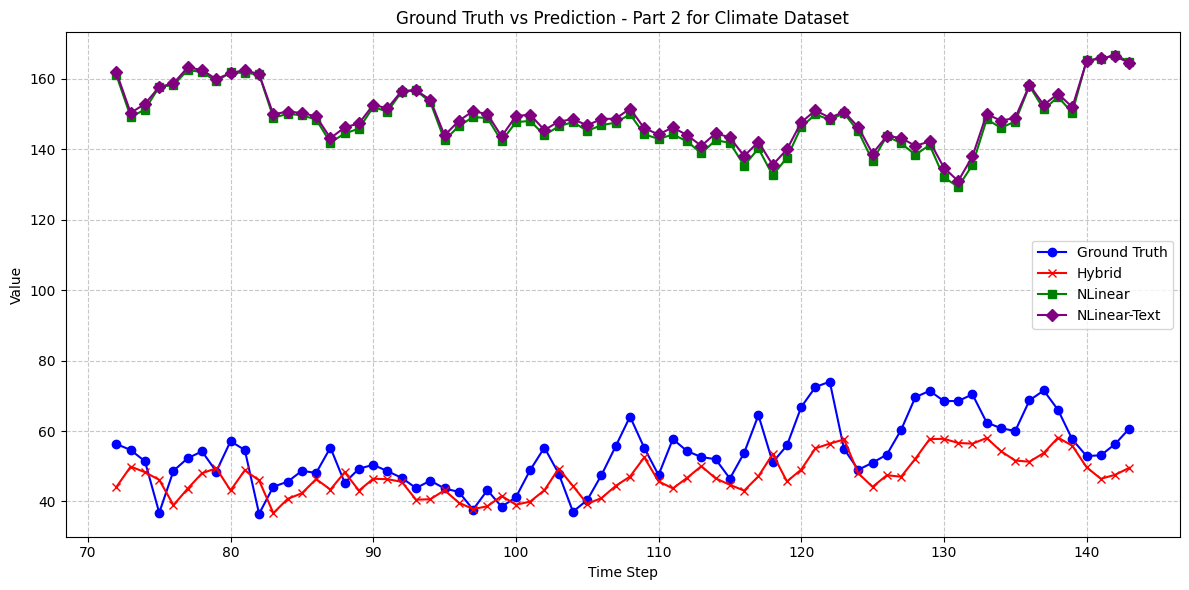

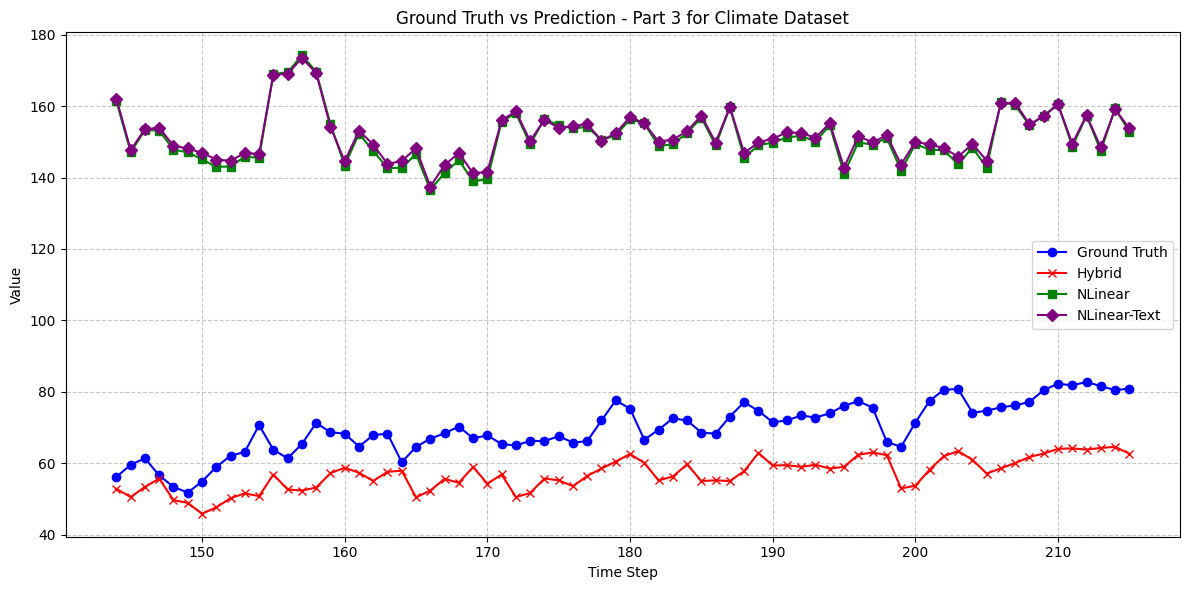

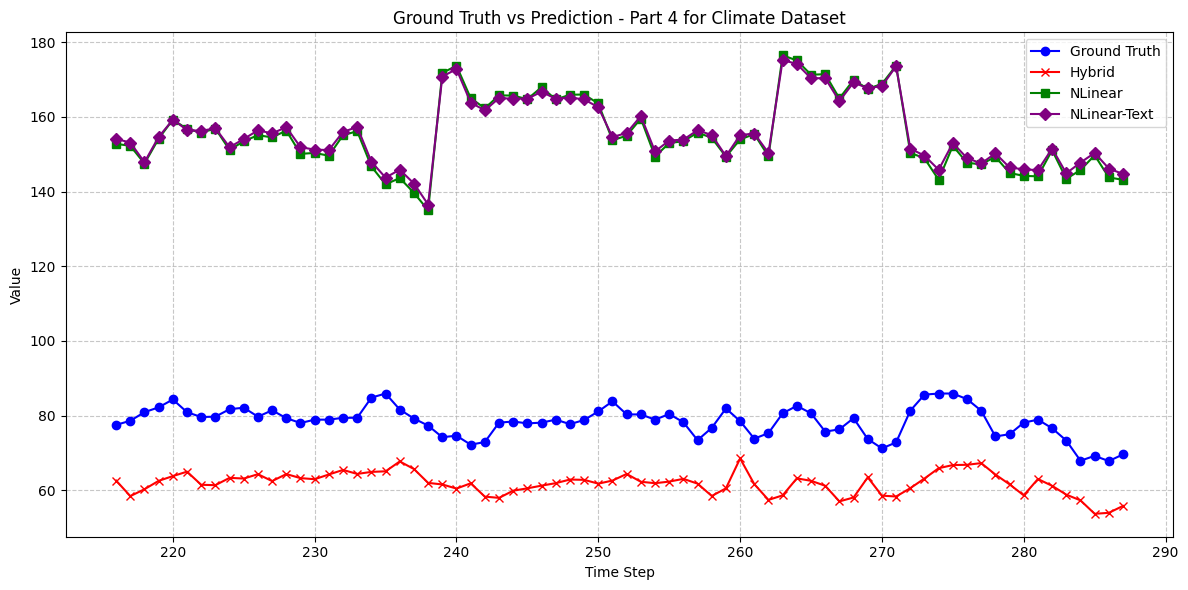

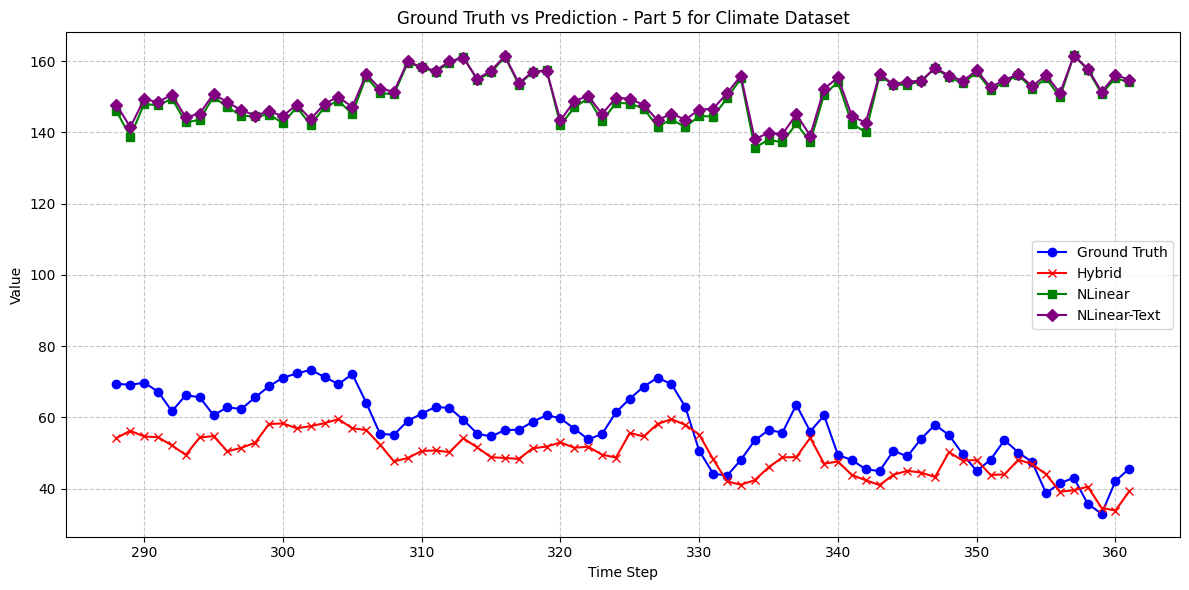

In [10]:
# Determine the length of the data and divide into 5 parts
index_length = len(df.index)
step = index_length // 5

# Loop over each part to plot and save it as a separate figure
for i in range(5):
    start_idx = i * step
    end_idx = (i + 1) * step if i < 4 else index_length  # Ensure the last plot includes all remaining data
    
    # Create a new figure for each part
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Plot the data for each part
    ax.plot(df.index[start_idx:end_idx], df['output_times'].apply(lambda x: x[0])[start_idx:end_idx], 
            color='blue', label='Ground Truth', marker='o')
    ax.plot(df.index[start_idx:end_idx], df['pred_times'].apply(lambda x: x[0])[start_idx:end_idx], 
            color='red', label='Hybrid', marker='x')
    ax.plot(df_nlinear.index[start_idx:end_idx], df_nlinear['nlinear_times'].apply(lambda x: x[0][0])[start_idx:end_idx], 
            color='green', label='NLinear', marker='s')
    ax.plot(df_nlinear_text.index[start_idx:end_idx], df_nlinear_text['nlinear_text_times'].apply(lambda x: x[0][0])[start_idx:end_idx], 
            color='purple', label='NLinear-Text', marker='D')
    
    # Customize the plot
    ax.set_title(f'Ground Truth vs Prediction - Part {i+1} for Climate Dataset')
    ax.set_xlabel('Time Step')
    ax.set_ylabel('Value')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.7)
    
    # Save each plot as a separate image
    plt.tight_layout()
    plt.savefig(f'plot_part_{i+1}_climate.png')
    plt.show()
